In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D

2023-03-03 13:32:53.792269: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-03 13:32:54.889383: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-03 13:32:54.889515: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-03 13:32:54.889523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
TRAIN_DIR = '/home/shubham/Downloads/archive1/train/train/'
TEST_DIR = '/home/shubham/Downloads/archive1/test/test/'

In [3]:
def load_dataset(directory):
    image_paths = []
    labels = []
    
    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path = os.path.join(directory, label, filename)
            image_paths.append(image_path)
            labels.append(label)
            
        print(label, "Completed")
        
    return image_paths, labels

In [4]:
## convert into dataframe
train = pd.DataFrame()
train['image'], train['label'] = load_dataset(TRAIN_DIR)
# shuffle the dataset
train = train.sample(frac=1).reset_index(drop=True)
train.head()

fear Completed
happy Completed
surprise Completed
disgust Completed
angry Completed
neutral Completed
sad Completed


,image,label
0,/home/shubham/Downloads/archive1/train/train/n...,neutral
1,/home/shubham/Downloads/archive1/train/train/n...,neutral
2,/home/shubham/Downloads/archive1/train/train/n...,neutral
3,/home/shubham/Downloads/archive1/train/train/s...,sad
4,/home/shubham/Downloads/archive1/train/train/f...,fear


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = load_dataset(TEST_DIR)
test.head()

fear Completed
happy Completed
surprise Completed
disgust Completed
angry Completed
neutral Completed
sad Completed


,image,label
0,/home/shubham/Downloads/archive1/test/test/fea...,fear
1,/home/shubham/Downloads/archive1/test/test/fea...,fear
2,/home/shubham/Downloads/archive1/test/test/fea...,fear
3,/home/shubham/Downloads/archive1/test/test/fea...,fear
4,/home/shubham/Downloads/archive1/test/test/fea...,fear


In [6]:
#EDA

<AxesSubplot:ylabel='label'>

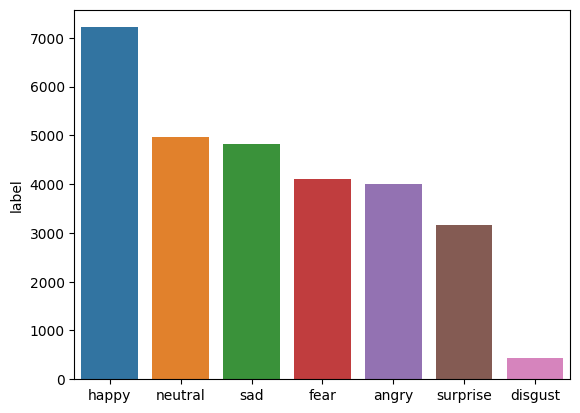

In [7]:
sns.barplot(x=train['label'].value_counts().index, y=train['label'].value_counts())

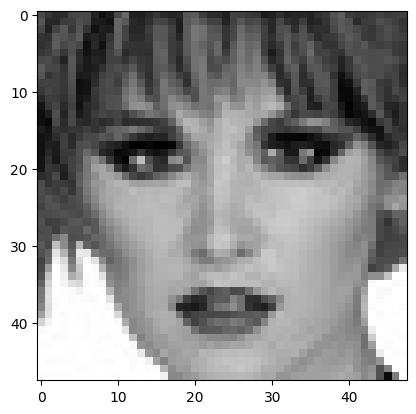

In [8]:
from PIL import Image
img = Image.open(train['image'][1])
plt.imshow(img, cmap='gray');

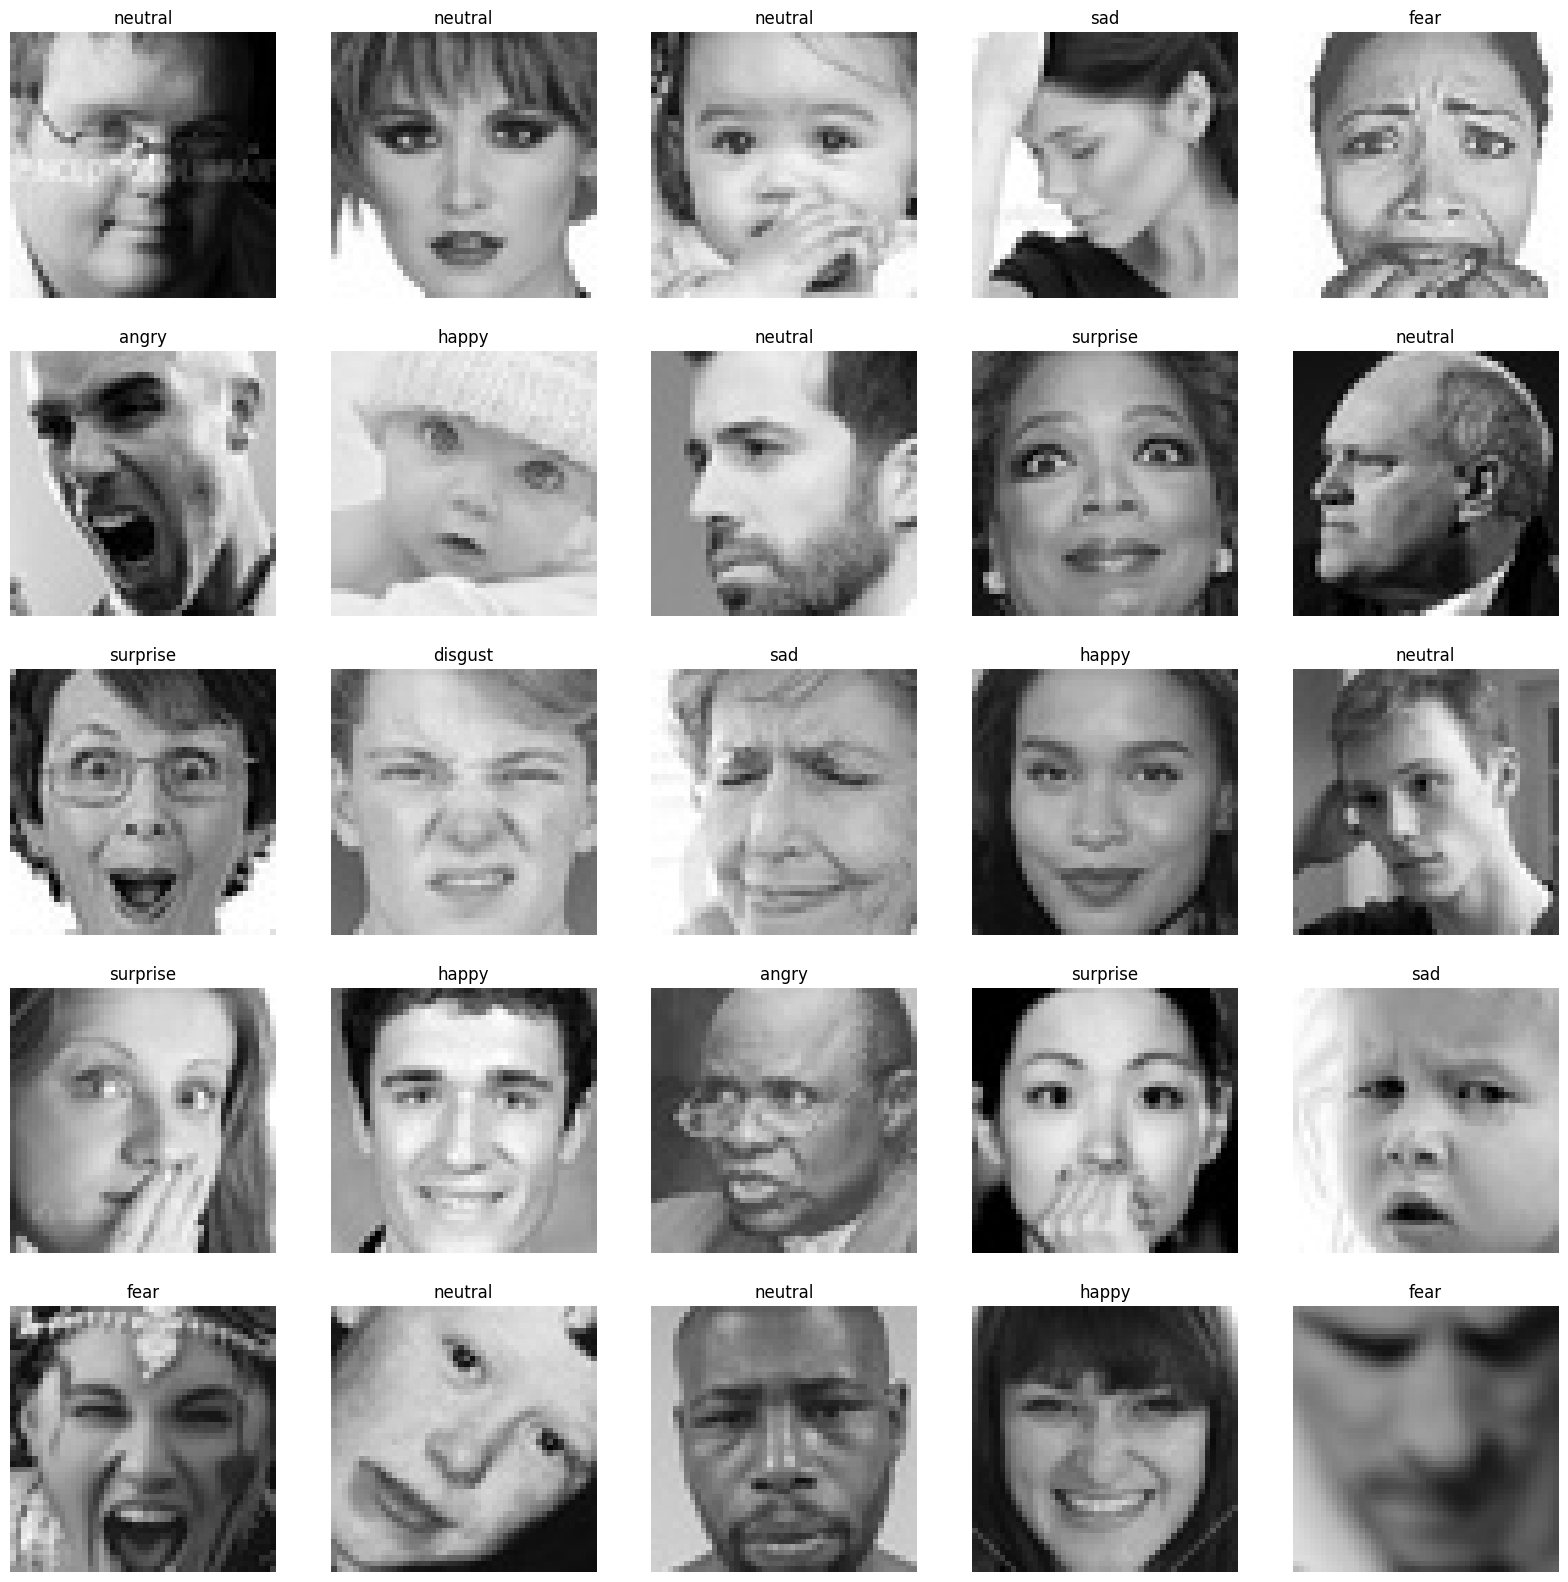

In [9]:
# to display grid of images
plt.figure(figsize=(20,20))
files = train.iloc[0:25]

for index, file, label in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

In [ ]:
#Feature Extraction

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [13]:
## normalize the image
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
## convert label to integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [15]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [16]:
y_train[0]

array([0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [17]:
# config
input_shape = (48, 48, 1)
output_class = 7

In [ ]:
#Model Creation

In [18]:
from tensorflow.keras.layers import Dense,Dropout, Flatten

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

2023-03-03 13:39:05.162391: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-03 13:39:05.227927: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-03-03 13:39:05.227956: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-03 13:39:05.228831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neur

In [20]:
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20


2023-03-03 13:39:22.918569: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 264582144 exceeds 10% of free system memory.
2023-03-03 13:39:24.146821: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138674176 exceeds 10% of free system memory.


  1/225 [..............................] - ETA: 10:53 - loss: 1.9296 - accuracy: 0.1719

2023-03-03 13:39:25.882043: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138674176 exceeds 10% of free system memory.
2023-03-03 13:39:26.034183: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138674176 exceeds 10% of free system memory.


  2/225 [..............................] - ETA: 7:00 - loss: 1.9621 - accuracy: 0.1836 

2023-03-03 13:39:27.769572: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 138674176 exceeds 10% of free system memory.


225/225 [==============================] - 395s 2s/step - loss: 1.8243 - accuracy: 0.2459 - val_loss: 1.8127 - val_accuracy: 0.2471
Epoch 2/20
225/225 [==============================] - 392s 2s/step - loss: 1.7996 - accuracy: 0.2516 - val_loss: 1.7594 - val_accuracy: 0.2647
Epoch 3/20
225/225 [==============================] - 399s 2s/step - loss: 1.7109 - accuracy: 0.3017 - val_loss: 1.6350 - val_accuracy: 0.3518
Epoch 4/20
225/225 [==============================] - 396s 2s/step - loss: 1.5756 - accuracy: 0.3811 - val_loss: 1.4419 - val_accuracy: 0.4420
Epoch 5/20
225/225 [==============================] - 395s 2s/step - loss: 1.4838 - accuracy: 0.4207 - val_loss: 1.3617 - val_accuracy: 0.4766
Epoch 6/20
225/225 [==============================] - 342s 2s/step - loss: 1.4285 - accuracy: 0.4484 - val_loss: 1.3559 - val_accuracy: 0.4741
Epoch 7/20
225/225 [==============================] - 378s 2s/step - loss: 1.3920 - accuracy: 0.4677 - val_loss: 1.2813 - val_accuracy: 0.5095
Epoch 8/20

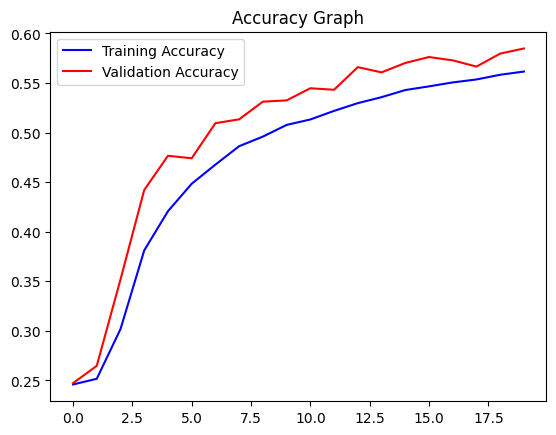

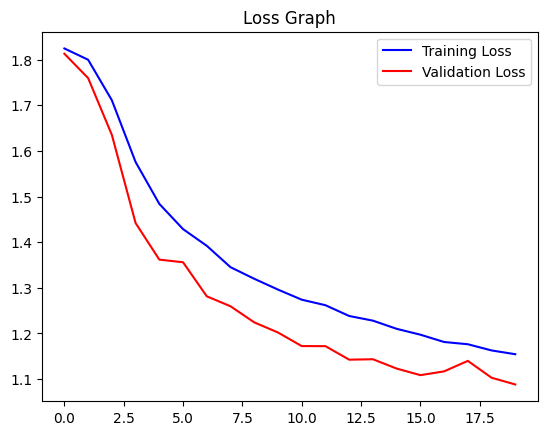

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Original Output: happy
1/1 [==============================] - 0s 104ms/step
Predicted Output: happy


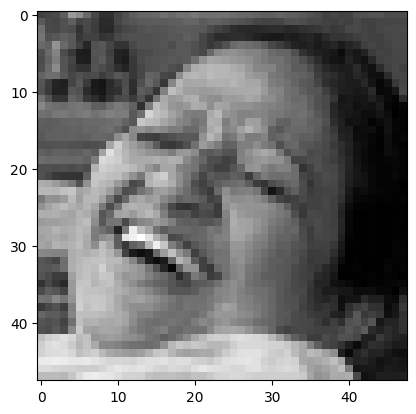

In [22]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');

Original Output: angry
1/1 [==============================] - 0s 15ms/step
Predicted Output: angry


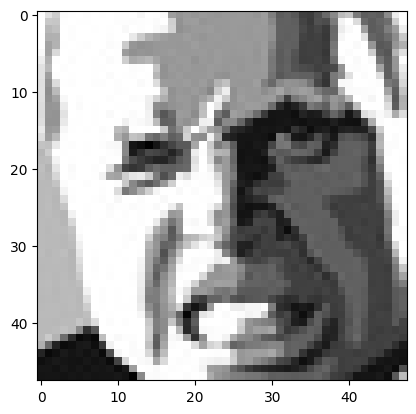

In [29]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');